In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Universidade Federal do Ceará**
## **Departamento de Computação**
## **Disciplina: Métodos Numéricos**
## **Prof. Dr. João Paulo do Vale Madeiro**

## **Alunos:**
## **Pedro Leinos Falcão Cunha - 542114**
## **Gabriel Vasconcelos Fruet - 537618**
## **Kelvin Leandro Martins - 540006**

# Funções

## Pivotação parcial de Gauss

In [ ]:
def pivot(j, A, B):
    n = len(A)

    # Initialize boolean for row exchange to False
    swap = False

    # Identify the element of maximum absolute value and its position
    max_abs_val = abs(A[j][j])
    pivot_row = j
    for i in range(j + 1, n):
        abs_val = abs(A[i][j])
        if abs_val > max_abs_val:
            max_abs_val = abs_val
            pivot_row = i

    if j != pivot_row:
        A[j], A[pivot_row] = A[pivot_row], A[j]
        B[j], B[pivot_row] = B[pivot_row], B[j]
        swap = True

    # Return the boolean value (True or False)
    return swap


def backward_substitution(A, B):
    n = len(A)

    # Initialize a vector of size n with elements as 0
    solution = [0] * n

    # Calculating the solution vector
    for i in range(n - 1, -1, -1):
        summation = sum(A[i][j] * solution[j] for j in range(i + 1, n))
        solution[i] = (B[i] - summation) / A[i][i]

    return solution


def pivot_gauss(A, B):
    n = len(A)

    for k in range(0, n - 1):
        pivot_row = k
        max_val = abs(A[k][k])
        for i in range(k + 1, n):
            if abs(A[i][k]) > max_val:
                max_val = abs(A[i][k])
                pivot_row = i

        if k != pivot_row:
            A[k], A[pivot_row] = A[pivot_row], A[k]
            B[k], B[pivot_row] = B[pivot_row], B[k]

        for i in range(k + 1, n):
            m = -A[i][k] / A[k][k]
            for j in range(k + 1, n):
                A[i][j] += m * A[k][j]
            B[i] += m * B[k]
            A[i][k] = 0

    # Backward substitution
    solution = [0] * n
    for i in range(n - 1, -1, -1):
        summation = sum(A[i][j] * solution[j] for j in range(i + 1, n))
        solution[i] = (B[i] - summation) / A[i][i]

    return solution

## Bissecção

In [ ]:
def bisection (f, a, b, err, iter=50):
    fxa = f(a)
    fxb = f(b)
    xr = (a + b) / 2
    fxr = f(xr)
    i = 0

    while i < iter and abs((xr - a) / xr) > err:
        if fxa * fxr > 0:
            a = xr
            fxa = f(a)
        else:
            b = xr
            fxb = f(b)
        xr = (a + b) / 2
        fxr = f(xr)
        i += 1

    # print("Iterat.: ", i)
    # print("% error: ", abs((xr - a) / xr) * 100)
    return xr

## Spline 2º grau

In [ ]:
def splinequad(x, fx):
    # Determine the number of points
    points = len(x)
    # Calculate the number of intervals between points
    ninterval = points - 1
    # Constants used for calculations
    c = 3
    const = (c * ninterval) - 1

    # Initialize matrix A with zeros
    A = [[0] * (const + 1) for _ in range(const)]
    # Initialize vector b
    b = []

    # Equations and values for boundary conditions
    A_ext = [
        [x[0] ** 2, x[0], 1],
        [x[ninterval] ** 2, x[ninterval], 1]
    ]
    b_ext = [fx[0], fx[ninterval]]

    # Lists for internal equations and values
    A_int = []
    b_int = []
    # Lists for derivative constraints
    A_deriv = []
    b_deriv = []

    # Loop through internal points to create equations and values
    for i in range(1, ninterval):
        A_int.extend([[x[i] ** 2, x[i], 1], [x[i] ** 2, x[i], 1]])
        b_int.extend([fx[i], fx[i]])
        A_deriv.extend([[2 * x[i], 1, 0, -2 * x[i], -1, 0]])
        b_deriv.append(0)

    # Append internal, boundary, and derivative values to vector b
    b.extend(b_int)
    b.extend(b_ext)
    b.extend(b_deriv)

    # Store lengths of different sections for later use
    aux1 = len(A_int)
    aux2 = len(A_ext)
    aux3 = len(A_deriv)

    aux = 1
    j = 0

    # Fill matrix A with values from internal equations
    for i in range(0, aux1):
        if aux % 2 == 0:
            j += 3
        A[i][j:j + 3] = A_int[i]
        aux += 1

    # Fill matrix A with values from boundary equations
    for i in range(aux1, aux1 + aux2):
        if i == aux1:
            A[i][0:3] = A_ext[0]
        if i == aux1 + aux2 - 1:
            A[i][const - 2:const + 1] = A_ext[1]

    j = 0

    # Fill matrix A with values from derivative equations
    for i in range(aux1 + aux2, aux1 + aux2 + aux3):
        A[i][j:j + 6] = A_deriv[i - (aux1 + aux2)]
        j += 3

    # Remove the first column of matrix A
    for i in range(const):
        A[i].pop(0)

    # Return the constructed matrix A and vector b
    return A, b

## Spline 3º grau

In [ ]:
def splinecubic(x, fx):
    # Determine the number of points
    points = len(x)
    # Calculate the number of intervals between points
    ninterval = points - 1
    # Constants used for calculations
    c = 4
    const = (c * ninterval) - 1

    # Initialize matrix A with zeros
    A = [[0] * (const + 1) for _ in range(const + 1)]
    # Initialize vector b
    b = []

    # Equations and values for boundary conditions
    A_ext = [
        [x[0] ** 3, x[0] ** 2, x[0], 1],
        [x[ninterval] ** 3, x[ninterval] ** 2, x[ninterval], 1]
    ]
    b_ext = [fx[0], fx[ninterval]]

    # Equations for second derivative constraints at endpoints
    A_deriv2ext = [
        [6 * x[0], 2, 0, 0],
        [6 * x[ninterval], 2, 0, 0]
    ]
    b_deriv2ext = [0, 0]

    # Lists for internal equations and values
    A_int = []
    b_int = []
    # Lists for first derivative constraints
    A_deriv1 = []
    b_deriv1 = []
    # Lists for second derivative constraints
    A_deriv2 = []
    b_deriv2 = []

    # Loop through internal points to create equations and values
    for i in range(1, ninterval):
        A_int.extend([[x[i] ** 3, x[i] ** 2, x[i], 1], [x[i] ** 3, x[i] ** 2, x[i], 1]])
        b_int.extend([fx[i], fx[i]])
        # Equations for first derivative constraints
        A_deriv1.extend([[3 * x[i] ** 2, 2 * x[i], 1, 0, -3 * x[i] ** 2, -2 * x[i], -1, 0]])
        b_deriv1.append(0)
        # Equations for second derivative constraints
        A_deriv2.extend([[6 * x[i], 2, 0, 0, -6 * x[i], -2, 0, 0]])
        b_deriv2.append(0)

    # Append internal, boundary, and derivative values to vector b
    b.extend(b_int)
    b.extend(b_ext)
    b.extend(b_deriv1)
    b.extend(b_deriv2)
    b.extend(b_deriv2ext)

    # Store lengths of different sections for later use
    aux1 = len(A_int)
    aux2 = len(A_ext)
    aux3 = len(A_deriv1)
    aux4 = len(A_deriv2)
    aux5 = len(A_deriv2ext)

    aux = 1
    j = 0

    # Fill matrix A with values from internal equations
    for i in range(0, aux1):
        if aux % 2 == 0:
            j += 4
        A[i][j:j + 4] = A_int[i]
        aux += 1

    # Fill matrix A with values from boundary equations
    for i in range(aux1, aux1 + aux2):
        if i == aux1:
            A[i][0:4] = A_ext[0]
        if i == aux1 + aux2 - 1:
            A[i][const - 3:const + 1] = A_ext[1]

    k = 0
    l = 0

    # Fill matrix A with values from first derivative equations
    for i in range(aux1 + aux2, aux1 + aux2 + aux3):
        A[i][k:k] = A_deriv1[i - (aux1 + aux2)]
        k += 4

    # Fill matrix A with values from second derivative equations
    for i in range(aux1 + aux2 + aux3, aux1 + aux2 + aux3 + aux4):
        A[i][l:l + 8] = A_deriv2[i - (aux1 + aux2 + aux3)]
        l += 4

    # Fill matrix A with values from second derivative at endpoints equations
    for i in range(aux1 + aux2 + aux3 + aux4, aux1 + aux2 + aux3 + aux4 + aux5):
        if i == aux1 + aux2 + aux3 + aux4:
            A[i][0:4] = A_deriv2ext[0]
        if i == aux1 + aux2 + aux3 + aux4 + aux5 - 1:
            A[i][const - 3:const + 1] = A_deriv2ext[1]

    # Return the constructed matrix A and vector b
    return A, b


# Questões

## Questão 1 - Considere os dados abaixo: (ok)

##$$
\begin{array}{|c|c|c|}
\hline
\text{x} & \text{1.6} & \text{2.0} & \text{2.5} & \text{3.2} & \text{4.0} & \text{4.5}\\
\hline
\text{f(x)} & \text{2} & \text{8} & \text{14} & \text{15} & \text{8} & \text{2}\\
\hline
\end{array}
$$

### (a) Obter e plotar o gráfico da spline quadrática que passa pelos pontos dados;

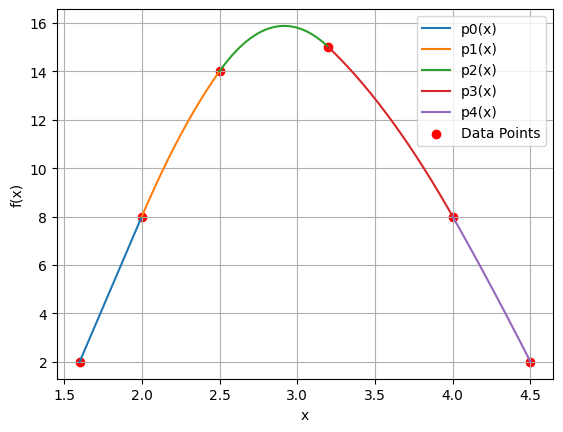

In [ ]:
# Given Data
x = np.array([1.6, 2.0, 2.5, 3.2, 4.0, 4.5])
fx = np.array([2.0, 8.0, 14.0, 15.0, 8.0, 2.0])

# Calculate A and B using Quadratic Spline Method
A, B = splinequad(x, fx)

# Solve for coefficients
coeffs_quadratic = [0]
coeffs_quadratic.extend(pivot_gauss(A, B))

# Define the segmented x values
x_segments_quadratic = [element for element in x]

# Define the list of polynomial lambda functions for each quadratic spline
polys_quadratic = [lambda x, i = i: (coeffs_quadratic[3 * i] * x**2) + (coeffs_quadratic[3 * i + 1] * x) + (coeffs_quadratic[3 * i + 2]) for i in range(len(coeffs_quadratic)//3)]

# Plot the function in its previous determinated bounds
for i in range(len(x_segments_quadratic) - 1):
    x_segment_quadratic = np.linspace(x_segments_quadratic[i], x_segments_quadratic[i + 1], 1001)
    y_segment_quadratic = polys_quadratic[i](x_segment_quadratic)  # Use the corresponding function from the list
    plt.plot(x_segment_quadratic, y_segment_quadratic, label=f'p{i}(x)')

# Plot the points in x and fx
plt.scatter(x, fx, color='r', label='Data Points')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

# Show the plot
plt.grid()
plt.show()

### (b) Obter e plotar o gráfico da spline cúbica que passa pelos pontos dados;

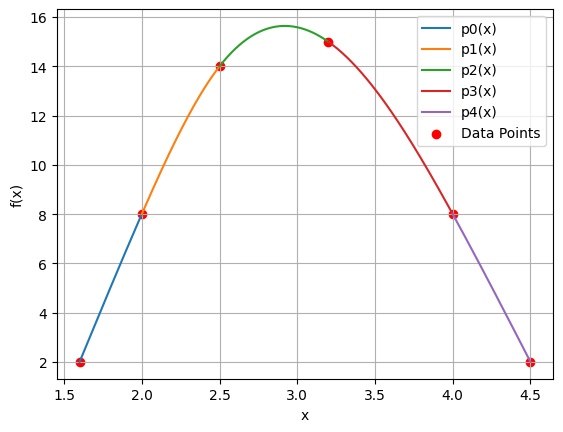

In [ ]:
# Given Data
x = np.array([1.6, 2.0, 2.5, 3.2, 4.0, 4.5])
fx = np.array([2.0, 8.0, 14.0, 15.0, 8.0, 2.0])

# Calculate A and B using Cubic Spline Method
A, B = splinecubic(x, fx)

# Solve for coefficients
coeffs_cubic = []
coeffs_cubic.extend(pivot_gauss(A, B))

# Define the segmented x values
x_segments_cubic = [element for element in x]

# Define the list of polynomial lambda functions for each cubic spline
polys_cubic = [lambda x, i = i: (coeffs_cubic[4 * i] * x**3) + (coeffs_cubic[4 * i + 1] * x**2) + (coeffs_cubic[4 * i + 2] * x) + (coeffs_cubic[4 * i + 3]) for i in range(len(coeffs_cubic)//4)]

# Plot the function in its previous determinated bounds
for i in range(len(x_segments_cubic) - 1):
    x_segment_cubic = np.linspace(x_segments_cubic[i], x_segments_cubic[i + 1], 1000)
    y_segment_cubic = polys_cubic[i](x_segment_cubic)  # Use the corresponding function from the list
    plt.plot(x_segment_cubic, y_segment_cubic, label=f'p{i}(x)')

# Plot the points in x and fx
plt.scatter(x, fx, color='r', label='Data Points')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

# Show the plot
plt.grid()
plt.show()

### (c) Estimar o valor de f(2,8) pelos dois métodos referidos acima.

In [ ]:
print(f'f(2.8) via spline quadratica: {polys_quadratic[2](2.8)}')
print(f'f(2.8) via spline cúbica....: {polys_cubic[2](2.8)}')

f(2.8) via spline quadratica: 15.7265306122449
f(2.8) via spline cúbica....: 15.515354832040074


## 2) Use interpolação por spline cúbica para a representação dos dados abaixo, e determine o valor de x que corresponde a $f(x) = 0.23$ para os seguintes dados tabulados através da solução de um problema de raiz do correspondente polinômio cúbico. (ok)

## $$
\begin{array}{|c|c|c|}
\hline
\text{x} & \text{2} & \text{3} & \text{4} & \text{5} & \text{6} & \text{7}\\
\hline
\text{f(x)} & \text{0.5} & \text{0,3333} & \text{0,25} & \text{0,2} & \text{0,1667} & \text{0,1429}\\
\hline
\end{array}
$$

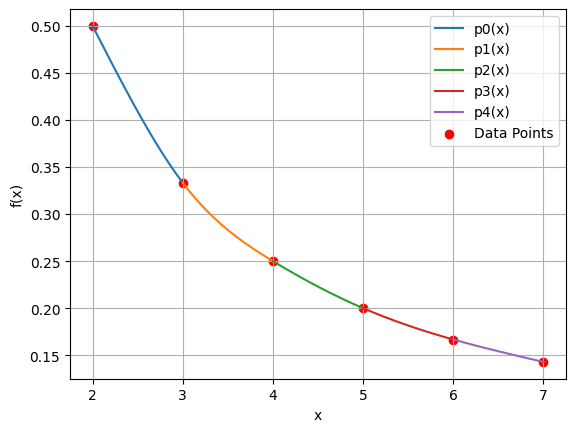

In [ ]:
# Given Data
x = np.array([2, 3, 4, 5, 6, 7])
fx = np.array([0.5, 0.3333, 0.25, 0.2, 0.1667, 0.1429])

# Calculate A and B using Cubic Spline Method
A, B = splinecubic(x, fx)

# Solve for coefficients
coeffs_cubic = []
coeffs_cubic.extend(pivot_gauss(A, B))

# Define the segmented x values
x_segments_cubic = [element for element in x]

# Define the list of polynomial lambda functions for each cubic spline
polys_cubic = [lambda x, i = i: (coeffs_cubic[4 * i] * x**3) + (coeffs_cubic[4 * i + 1] * x**2) + (coeffs_cubic[4 * i + 2] * x) + (coeffs_cubic[4 * i + 3]) for i in range(len(coeffs_cubic)//4)]

# Plot the function in its previous determinated bounds
for i in range(len(x_segments_cubic) - 1):
    x_segment_cubic = np.linspace(x_segments_cubic[i], x_segments_cubic[i + 1], 1001)
    y_segment_cubic = polys_cubic[i](x_segment_cubic)  # Use the corresponding function from the list
    plt.plot(x_segment_cubic, y_segment_cubic, label=f'p{i}(x)')

# Plot the points in x and fx
plt.scatter(x, fx, color='r', label='Data Points')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

# Show the plot
plt.grid()
plt.show()

In [ ]:
def inv(x):
  return polys_cubic[2](x) - 0.23

res31 = bisection(inv, 4, 5, 1e-9)
print(f'f^{-1}({0.23}): {res31}')

x0 = 4.361407984048128
print(f'f({x0}) = {polys_cubic[2](x0)}')

f^-1(0.23): 4.361407984048128
f(4.361407984048128) = 0.23000000017427058


## 3) Efetue o download do dataset Shampoo Sales Dataset1, no ambiente Python, o qual descreve o número de vendas mensais de shampoo ao longo de um período de três anos, e utilizando o processo de interpolação por spline cúbica, efetue o processo de upsampling para obter estimativas diárias de vendas.

https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv')

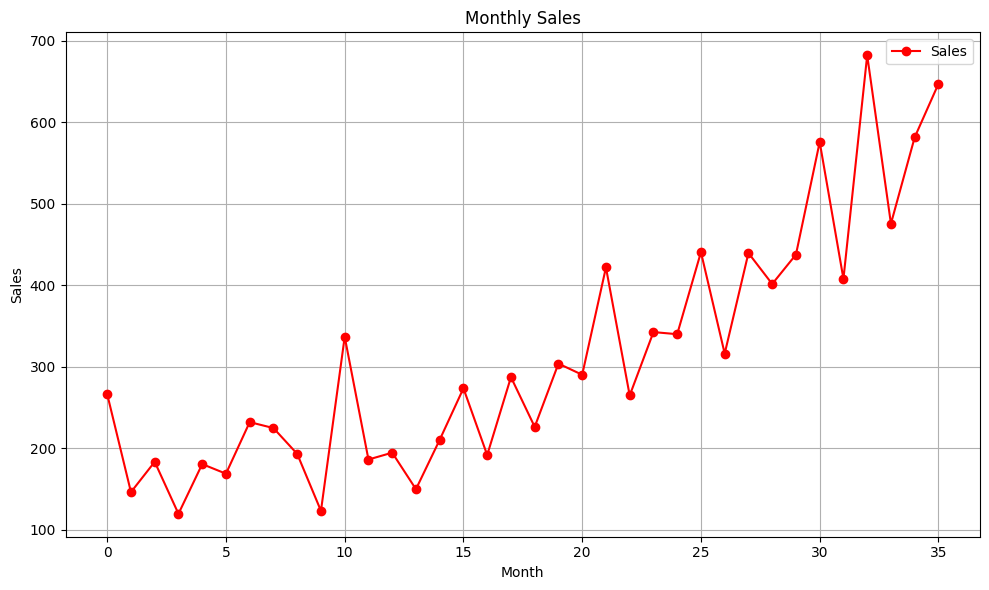

In [ ]:
months = df['Month'].tolist()
sales = df['Sales'].tolist()

# Convert the month and sales lists of strings to lists of floats
month_numeric = [12 * (float(m.split('-')[0]) - 1) +  (float(m.split('-')[1]) - 1) for m in months]
sales_numeric = [float(s) for s in sales]

# Plot with various style options
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(month_numeric, sales_numeric, marker='o', linestyle='-', color='r', label='Sales')

# Add a title and labels
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')

# Show grid lines
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust subplot parameters to prevent clipping of labels
plt.show()

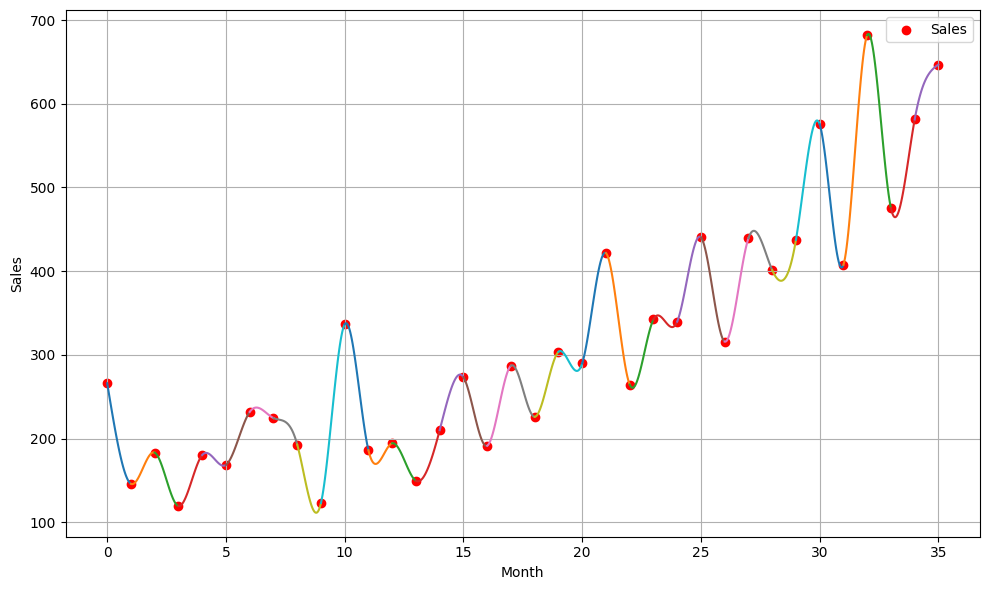

In [ ]:
days = 31

# Calculate A and B using Cubic Spline Method
A, B = splinecubic(month_numeric, sales_numeric)

# Solve for coefficients
coeffs_cubic = []
coeffs_cubic.extend(pivot_gauss(A, B))

# Define the segmented x values
month_segments = [month for month in month_numeric]

# Define the list of polynomial lambda functions for each quadratical spline
polys_cubic = [lambda x, i = i: (coeffs_cubic[4 * i] * x**3) + (coeffs_cubic[4 * i + 1] * x**2) + (coeffs_cubic[4 * i + 2] * x) + (coeffs_cubic[4 * i + 3]) for i in range(len(coeffs_cubic)//4)]

Sales_estimative_per_day = []

# Plot the function in its previous determinated bounds
plt.figure(figsize=(10, 6))  # Set the figure size
for i in range(len(month_segments) - 1):
    x_segment_cubic = np.linspace(month_segments[i], month_segments[i + 1], days)
    y_segment_cubic = polys_cubic[i](x_segment_cubic)
    Sales_estimative_per_day.append(y_segment_cubic)
    plt.plot(x_segment_cubic, y_segment_cubic)

# Plot the points in month_numeric and sales_numeric
plt.scatter(month_numeric, sales_numeric, color='r', label='Sales')

# Add labels and legend
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()

# Show the plot
plt.grid()
plt.tight_layout()  # Adjust subplot parameters to prevent clipping of labels
plt.show()

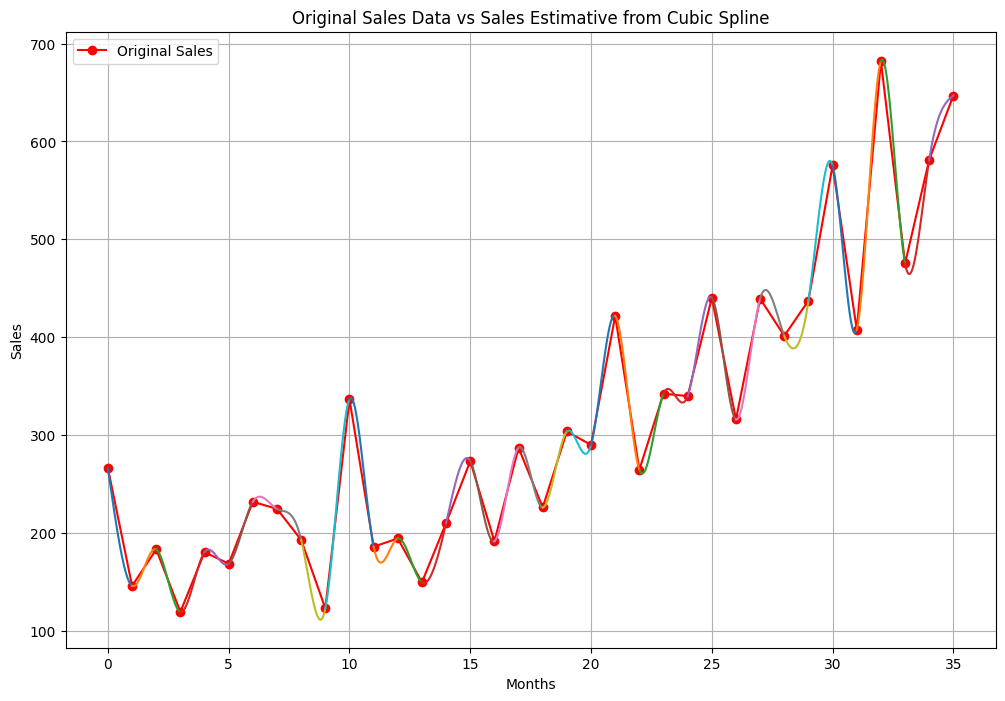

In [ ]:
# Plotting original sales data
plt.figure(figsize=(12, 8))  # Set the figure size
plt.plot(month_numeric, sales_numeric, marker='o', linestyle='-', color='r', label='Original Sales')

# Plotting sales estimative from cubic spline
for i in range(len(month_segments) - 1):
    x_segment_cubic = np.linspace(month_segments[i], month_segments[i + 1], days)
    y_segment_cubic = polys_cubic[i](x_segment_cubic)
    plt.plot(x_segment_cubic, y_segment_cubic)

# Additional plot configurations
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Original Sales Data vs Sales Estimative from Cubic Spline')
plt.legend()
plt.grid(True)
plt.show()

### Estimativa de vendas diárias:

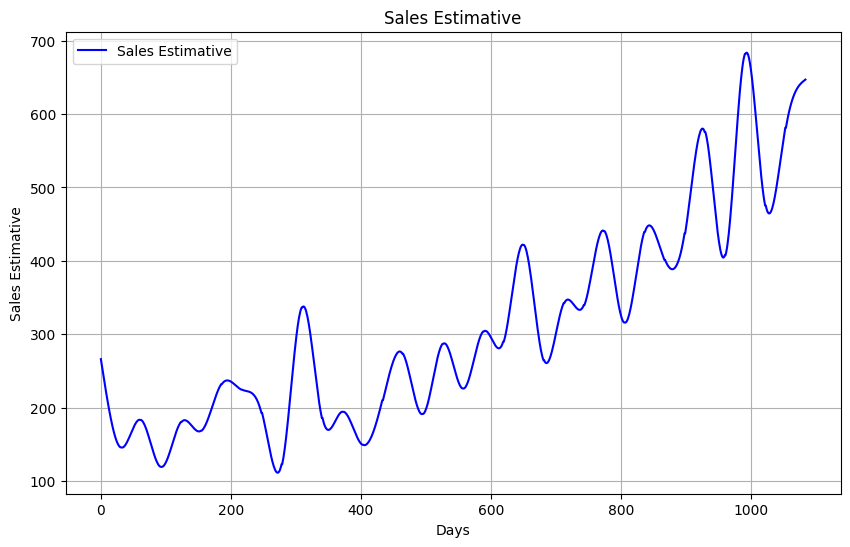

In [ ]:
# Calculate Sales Estimative and store in Sales_estimative list
Sales_estimative = []
for i in range(len(month_segments) - 1):
    x_segment_cubic = np.linspace(month_segments[i], month_segments[i + 1], days)
    y_segment_cubic = polys_cubic[i](x_segment_cubic)
    Sales_estimative.extend(y_segment_cubic)  # Extend Sales_estimative with current segment

# Plot Sales Estimative
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(np.arange(len(Sales_estimative)), Sales_estimative, linestyle='-', color='blue', label='Sales Estimative')

# Additional plot configurations
plt.xlabel('Days')
plt.ylabel('Sales Estimative')
plt.title('Sales Estimative')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Sales_estimative_per_day

[array([266.        , 260.25502743, 254.5216787 , 248.81157765,
        243.13634814, 237.507614  , 231.93699908, 226.43612723,
        221.01662227, 215.69010807, 210.46820846, 205.36254729,
        200.3847484 , 195.54643563, 190.85923283, 186.33476384,
        181.9846525 , 177.82052266, 173.85399817, 170.09670286,
        166.56026058, 163.25629517, 160.19643048, 157.39229035,
        154.85549863, 152.59767915, 150.63045576, 148.96545231,
        147.61429264, 146.58860058, 145.9       ]),
 array([145.9       , 145.55431681, 145.53418526, 145.8164417 ,
        146.37792246, 147.19546388, 148.24590229, 149.50607404,
        150.95281546, 152.56296288, 154.31335265, 156.18082111,
        158.14220458, 160.17433941, 162.25406194, 164.35820849,
        166.46361542, 168.54711905, 170.58555573, 172.55576178,
        174.43457356, 176.19882739, 177.82535961, 179.29100656,
        180.57260458, 181.64699001, 182.49099917, 183.08146842,
        183.39523408, 183.40913249, 183.1       ]),
